In [1]:
import pandas as pd
import numpy as np
import tweepy
import re 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver

In [2]:
samsung_reviews=[]

## Extracting reviews from amazon for product Samsung Galaxy S23 Ultra

In [3]:
for i in range (1,31):
    op=[]
    url ="https://www.amazon.in/product-reviews/B0BT9CXXXX/ref=psdc_1805560031_r0_B0BT9CXXXX?_encoding=UTF8&showViewpoints=1"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        op.append(reviews[i].text)    
    samsung_reviews = samsung_reviews+op

This is only to be able use a realtime url link for a product list present time and to be able runs an anaylsis on the reviews without manually adding any reviews and also not have any dummy reviews or a dataset

In [4]:
 samsung_reviews

['\nBought it after replacing S22 ultra trusted samsung one more time with this so far its good ...the biggest complain of 22Ultra  i.e. battery life is no longer in this one...Photos also looks quite impoved since 22Ultra..Edit :- battery life is crazy good 10 hours of SOT with Quad Hd resolution and 120Hz and dark theme my S22 ultra was at 30% just after 5 hrs of SOT loving it will use 23 ultra atleast for 3 years\n',
 '\nSwitched from iPhone 12 pro max to S23 Ultra for some reason. S23 Ultra is superfast, stylish and has very big screen but feeling somewhat inconvenient who used to iPhone. No regret for buying.\n',
 '\nSuperb performance, amazing camera..hope future updates can improve battery life\n',
 '\nPhone is very smooth and camera picture quality is excellent...Battery performance  one and half day it will last and fingerprint reader works well... worth buying this phone..\n',
 '\nYou can buy it if you can afford it but be sure to protect it as it comes with hefty price. If y

These are the reviews we got on the link of the samsung s23 ultra on amazon right now 

In [5]:
reviews = ' '.join(samsung_reviews)

This makes the value or the reviews in this case which is mentioned under samsung_reviews to use the .join() to joint two strings with the '' mentioned and save it all together into reviews

## Data Cleaning

In [6]:
reviews = re.sub("[^A-Za-z" "]+"," ",reviews).lower() 
reviews = re.sub("[0-9" "]+"," ",reviews).lower() 
reviews = re.sub(r'^https?:\/\/.*[\r\n]*', '', reviews).lower()

The re.sub() method performs global search and global replace on the given string. It is used for substituting a specific pattern in the string.

## Tokenize

In [7]:
reviews_token = word_tokenize(reviews)

The tokenize module provides a lexical scanner for Python source code, implemented in Python. The scanner in this module returns comments as tokens as well, making it useful for implementing “pretty-printers”, including colorizers for on-screen displays.

To simplify token stream handling, all operator and delimiter tokens and Ellipsis are returned using the generic OP token type. The exact type can be determined by checking the exact_type property on the named tuple returned from tokenize.tokenize().

In [8]:
reviews_without_sw = [word for word in reviews_token if not word in stopwords.words()] #the sw is stop words here

In [9]:
reviews_without_sw

['bought',
 'replacing',
 'ultra',
 'trusted',
 'samsung',
 'time',
 'biggest',
 'complain',
 'ultra',
 'battery',
 'life',
 'longer',
 'photos',
 'impoved',
 'ultra',
 'edit',
 'battery',
 'life',
 'crazy',
 'hours',
 'sot',
 'quad',
 'hd',
 'resolution',
 'hz',
 'dark',
 'theme',
 'ultra',
 'hrs',
 'sot',
 'loving',
 'ultra',
 'atleast',
 'years',
 'switched',
 'iphone',
 'pro',
 'max',
 'ultra',
 'reason',
 'ultra',
 'superfast',
 'stylish',
 'big',
 'screen',
 'feeling',
 'inconvenient',
 'iphone',
 'regret',
 'buying',
 'superb',
 'performance',
 'amazing',
 'camera',
 'hope',
 'future',
 'updates',
 'improve',
 'battery',
 'life',
 'phone',
 'smooth',
 'camera',
 'picture',
 'quality',
 'excellent',
 'battery',
 'performance',
 'half',
 'day',
 'fingerprint',
 'reader',
 'works',
 'worth',
 'buying',
 'phone',
 'buy',
 'afford',
 'protect',
 'hefty',
 'price',
 'coming',
 'iphone',
 'copy',
 'photos',
 'time',
 'setting',
 'found',
 'battery',
 'regular',
 'clone',
 'iphone',
 'd

In [10]:
reviews=' '.join(reviews_without_sw)

Here we are using the .join() again now on the reviews without any stopwords and again alloting them to reviews

## Word cloud

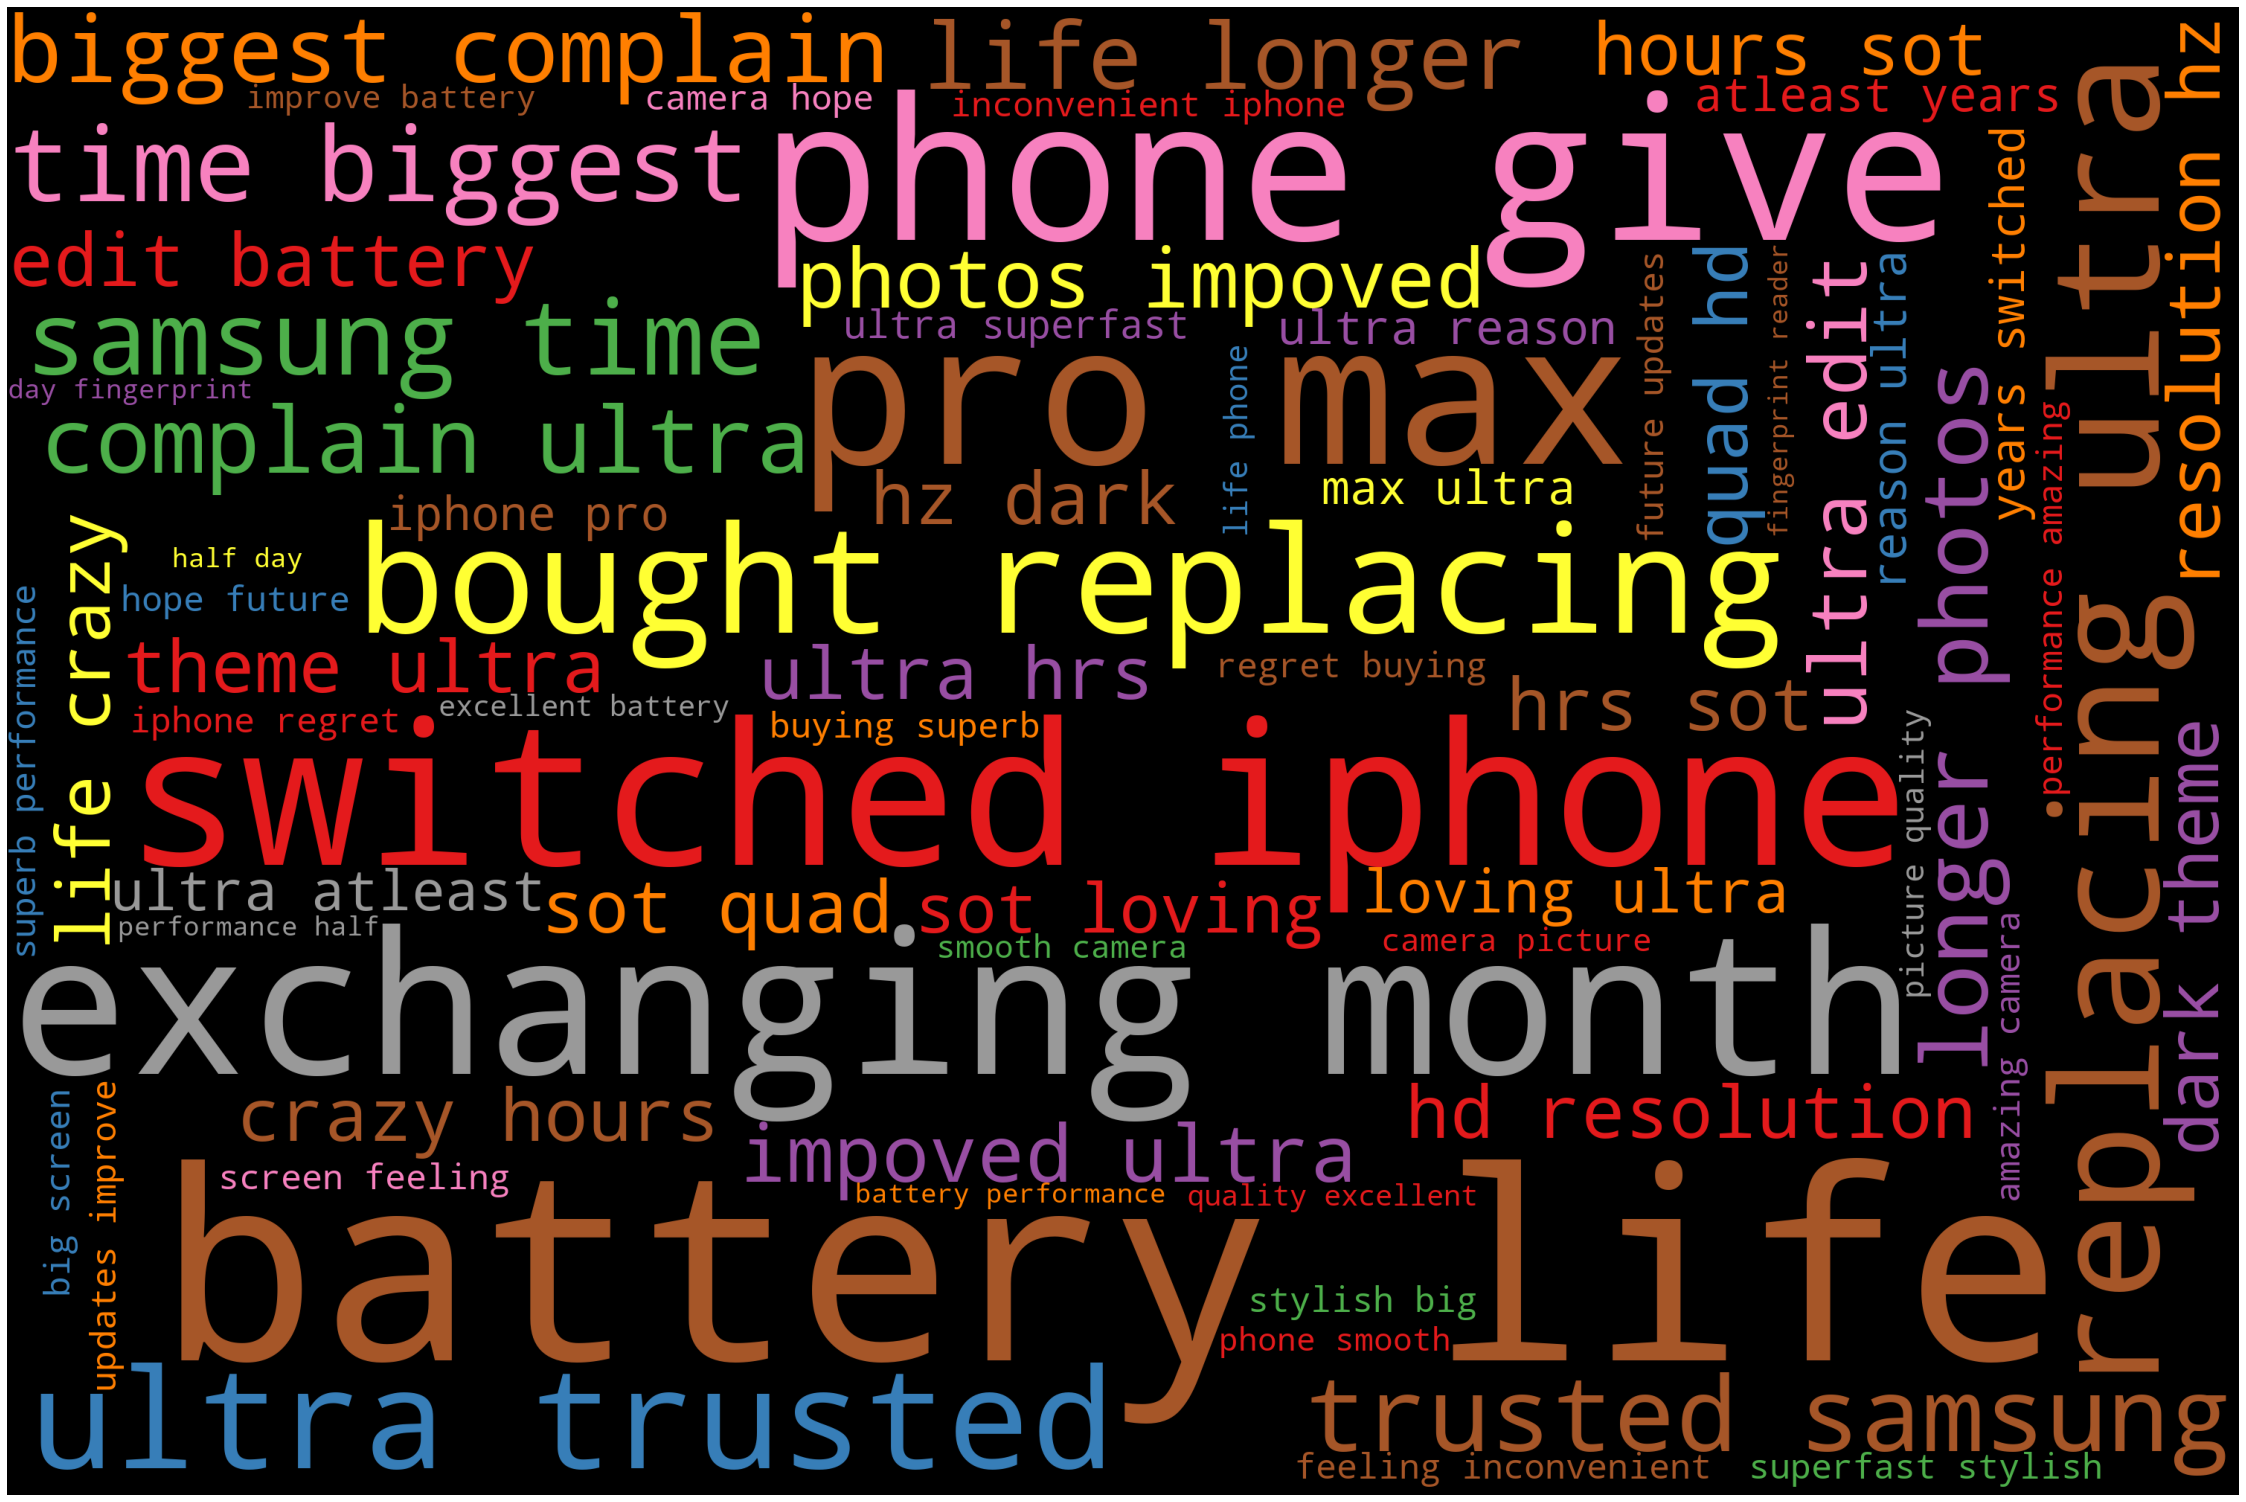

In [11]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    

from wordcloud import WordCloud, STOPWORDS
STOPWORDS.add('refresh')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=70,
                   colormap='Set1',stopwords=STOPWORDS).generate(reviews)
plot_cloud(wordcloud)

A tag cloud is a visual representation of text data, which is often used to depict keyword metadata on websites, or to visualize free form text. Tags are usually single words, and the importance of each tag is shown with font size or color. When used as website navigation aids, the terms are hyperlinked to items associated with the tag.

Here we have also used a user defined function which gives some basic parameters to the wordcloud result like wordcloud figure size, plot_cloud() to plot the wordcloud

## Emotion Mining

In [12]:
with open("C:\\Users\\senir\\negative-words.txt","r") as f:
    negative=f.read().split("\n")

here we have used a text file in my directory to analyse if the text has negative words 

In [13]:
negative = negative[35:]

In [14]:
reviews_neg=' '.join([word for word in reviews_without_sw if word in negative])

Here we use the .join() to make the words in reviews with out any stopwords if they the words it contains have any negative emotions to them

## Word Cloud for negative word

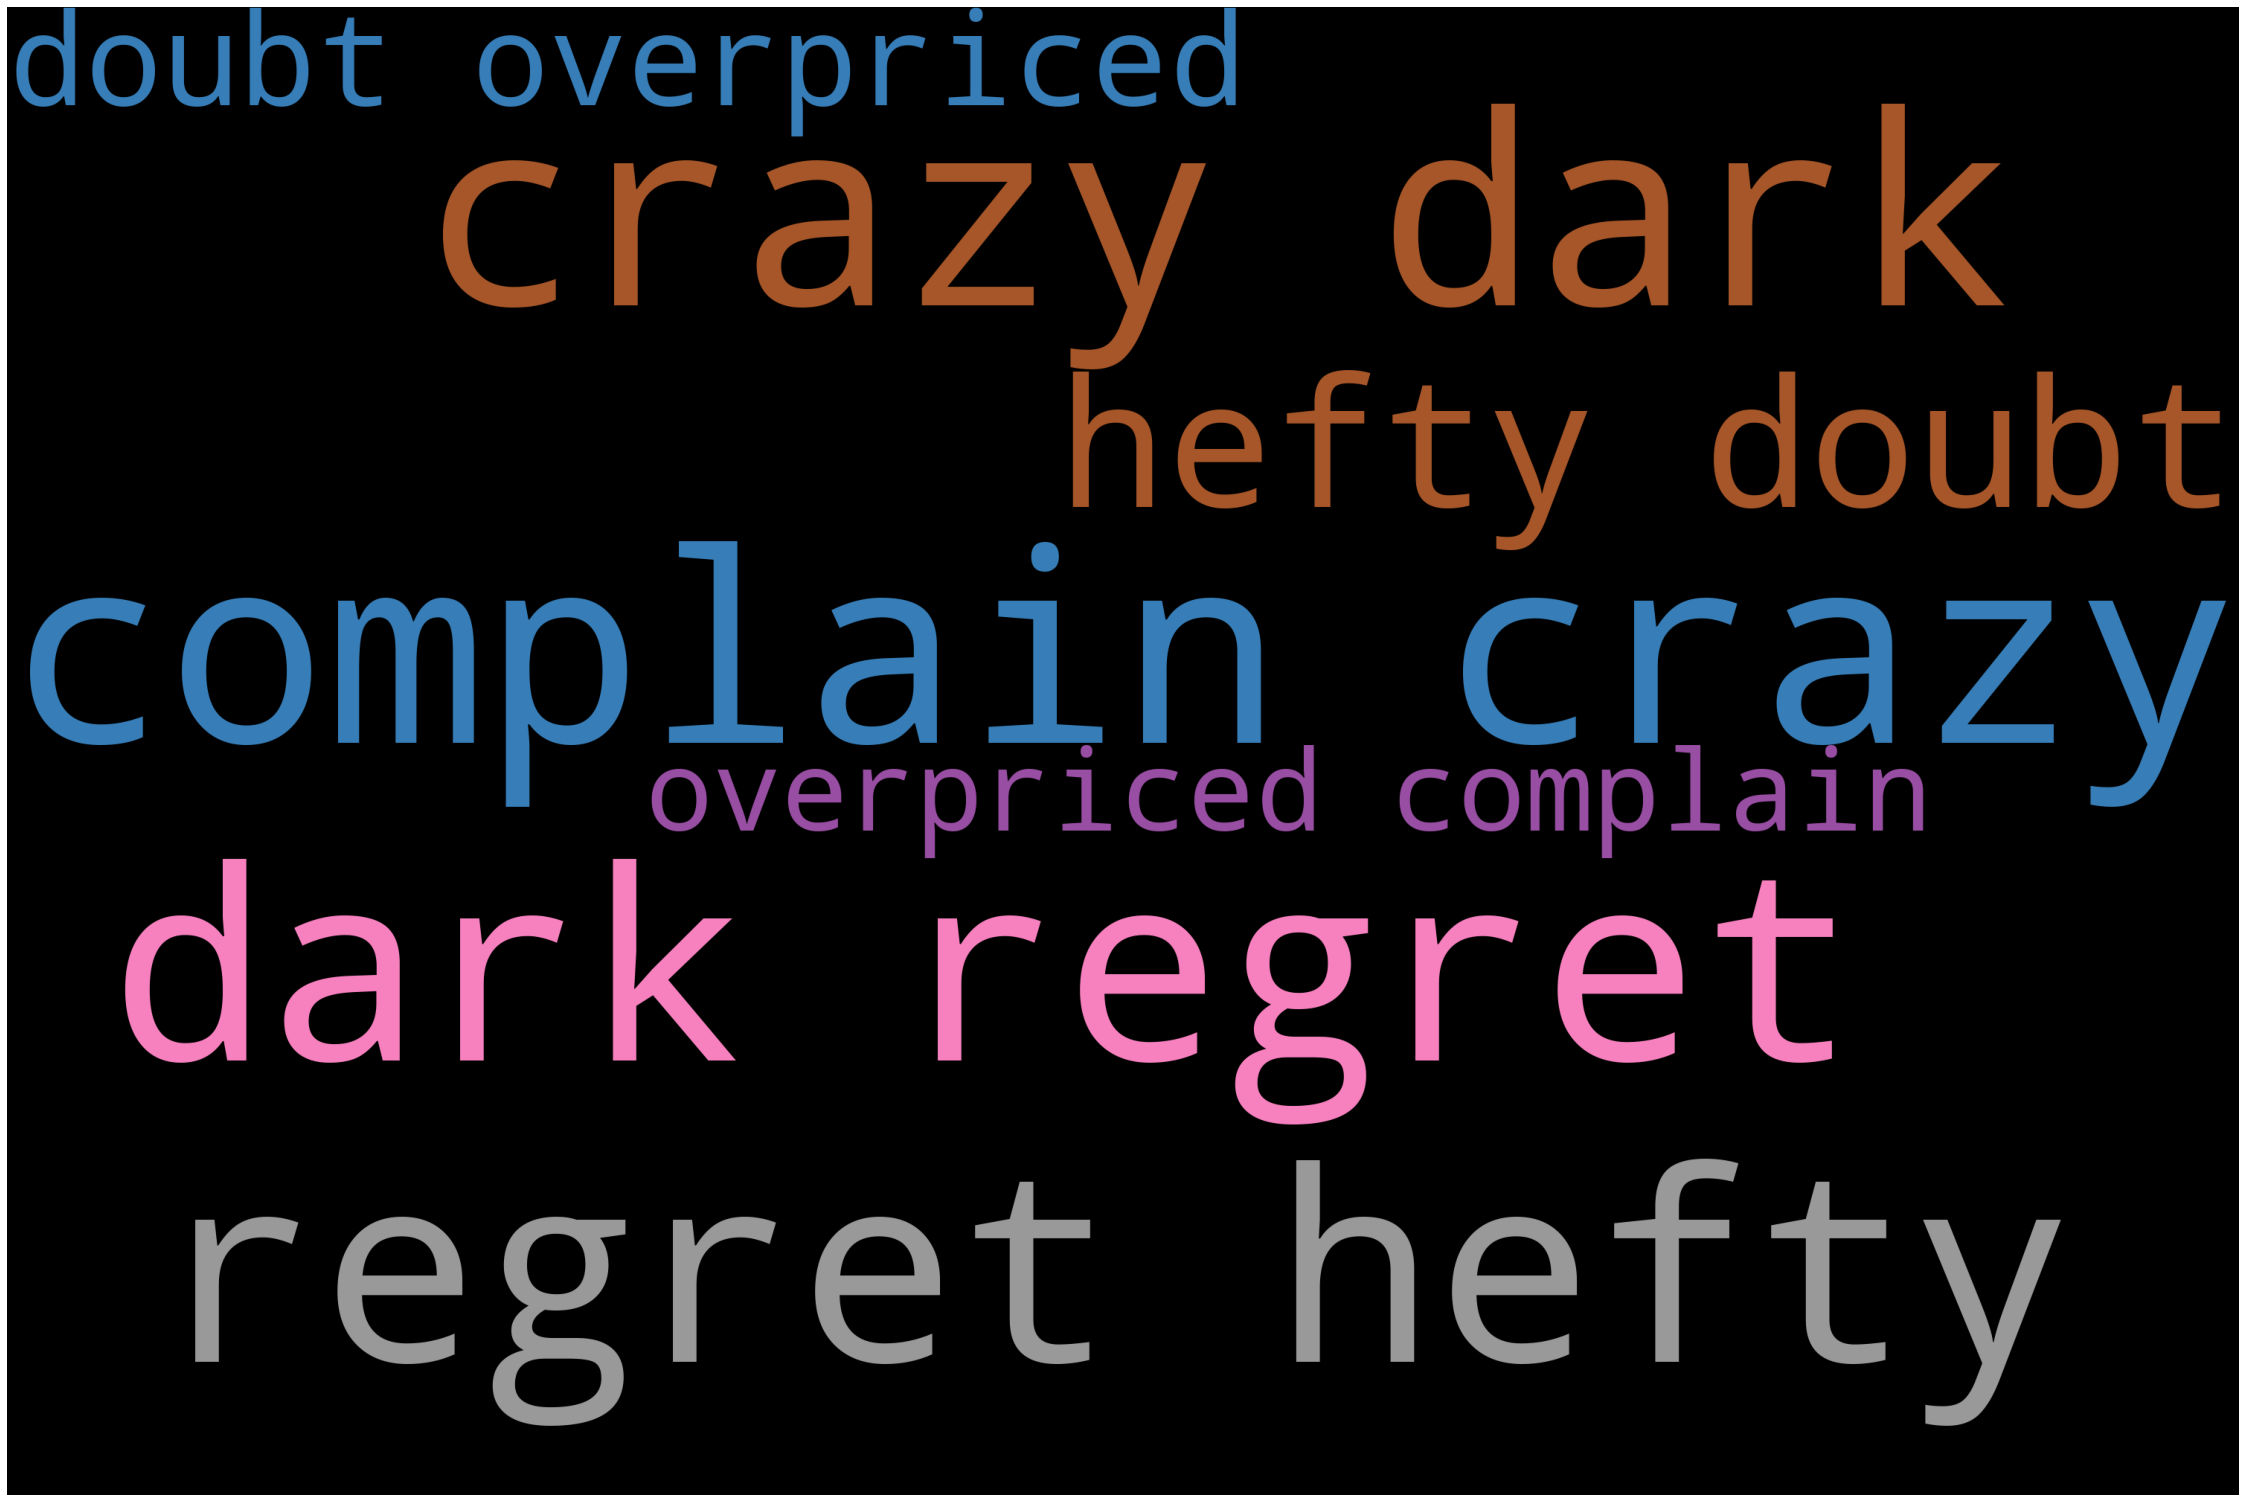

In [15]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    

from wordcloud import WordCloud, STOPWORDS
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=70,
                   colormap='Set1',stopwords=STOPWORDS).generate(reviews_neg)
plot_cloud(wordcloud)

In [16]:
with open("C:\\Users\\senir\\positive-words.txt","r") as f:
    positive=f.read().split("\n")

here we have used a text file in my directory to analyse if the text has positive words 

In [17]:
reviews_pos=' '.join([word for word in reviews if word in positive])
positive = positive[35:]

In [18]:
reviews_pos=' '.join([word for word in reviews_without_sw if word in positive])

Here we use the .join() to make the words in reviews with out any stopwords if they the words it contains have any positive emotions to them

## Word Cloud for positive word

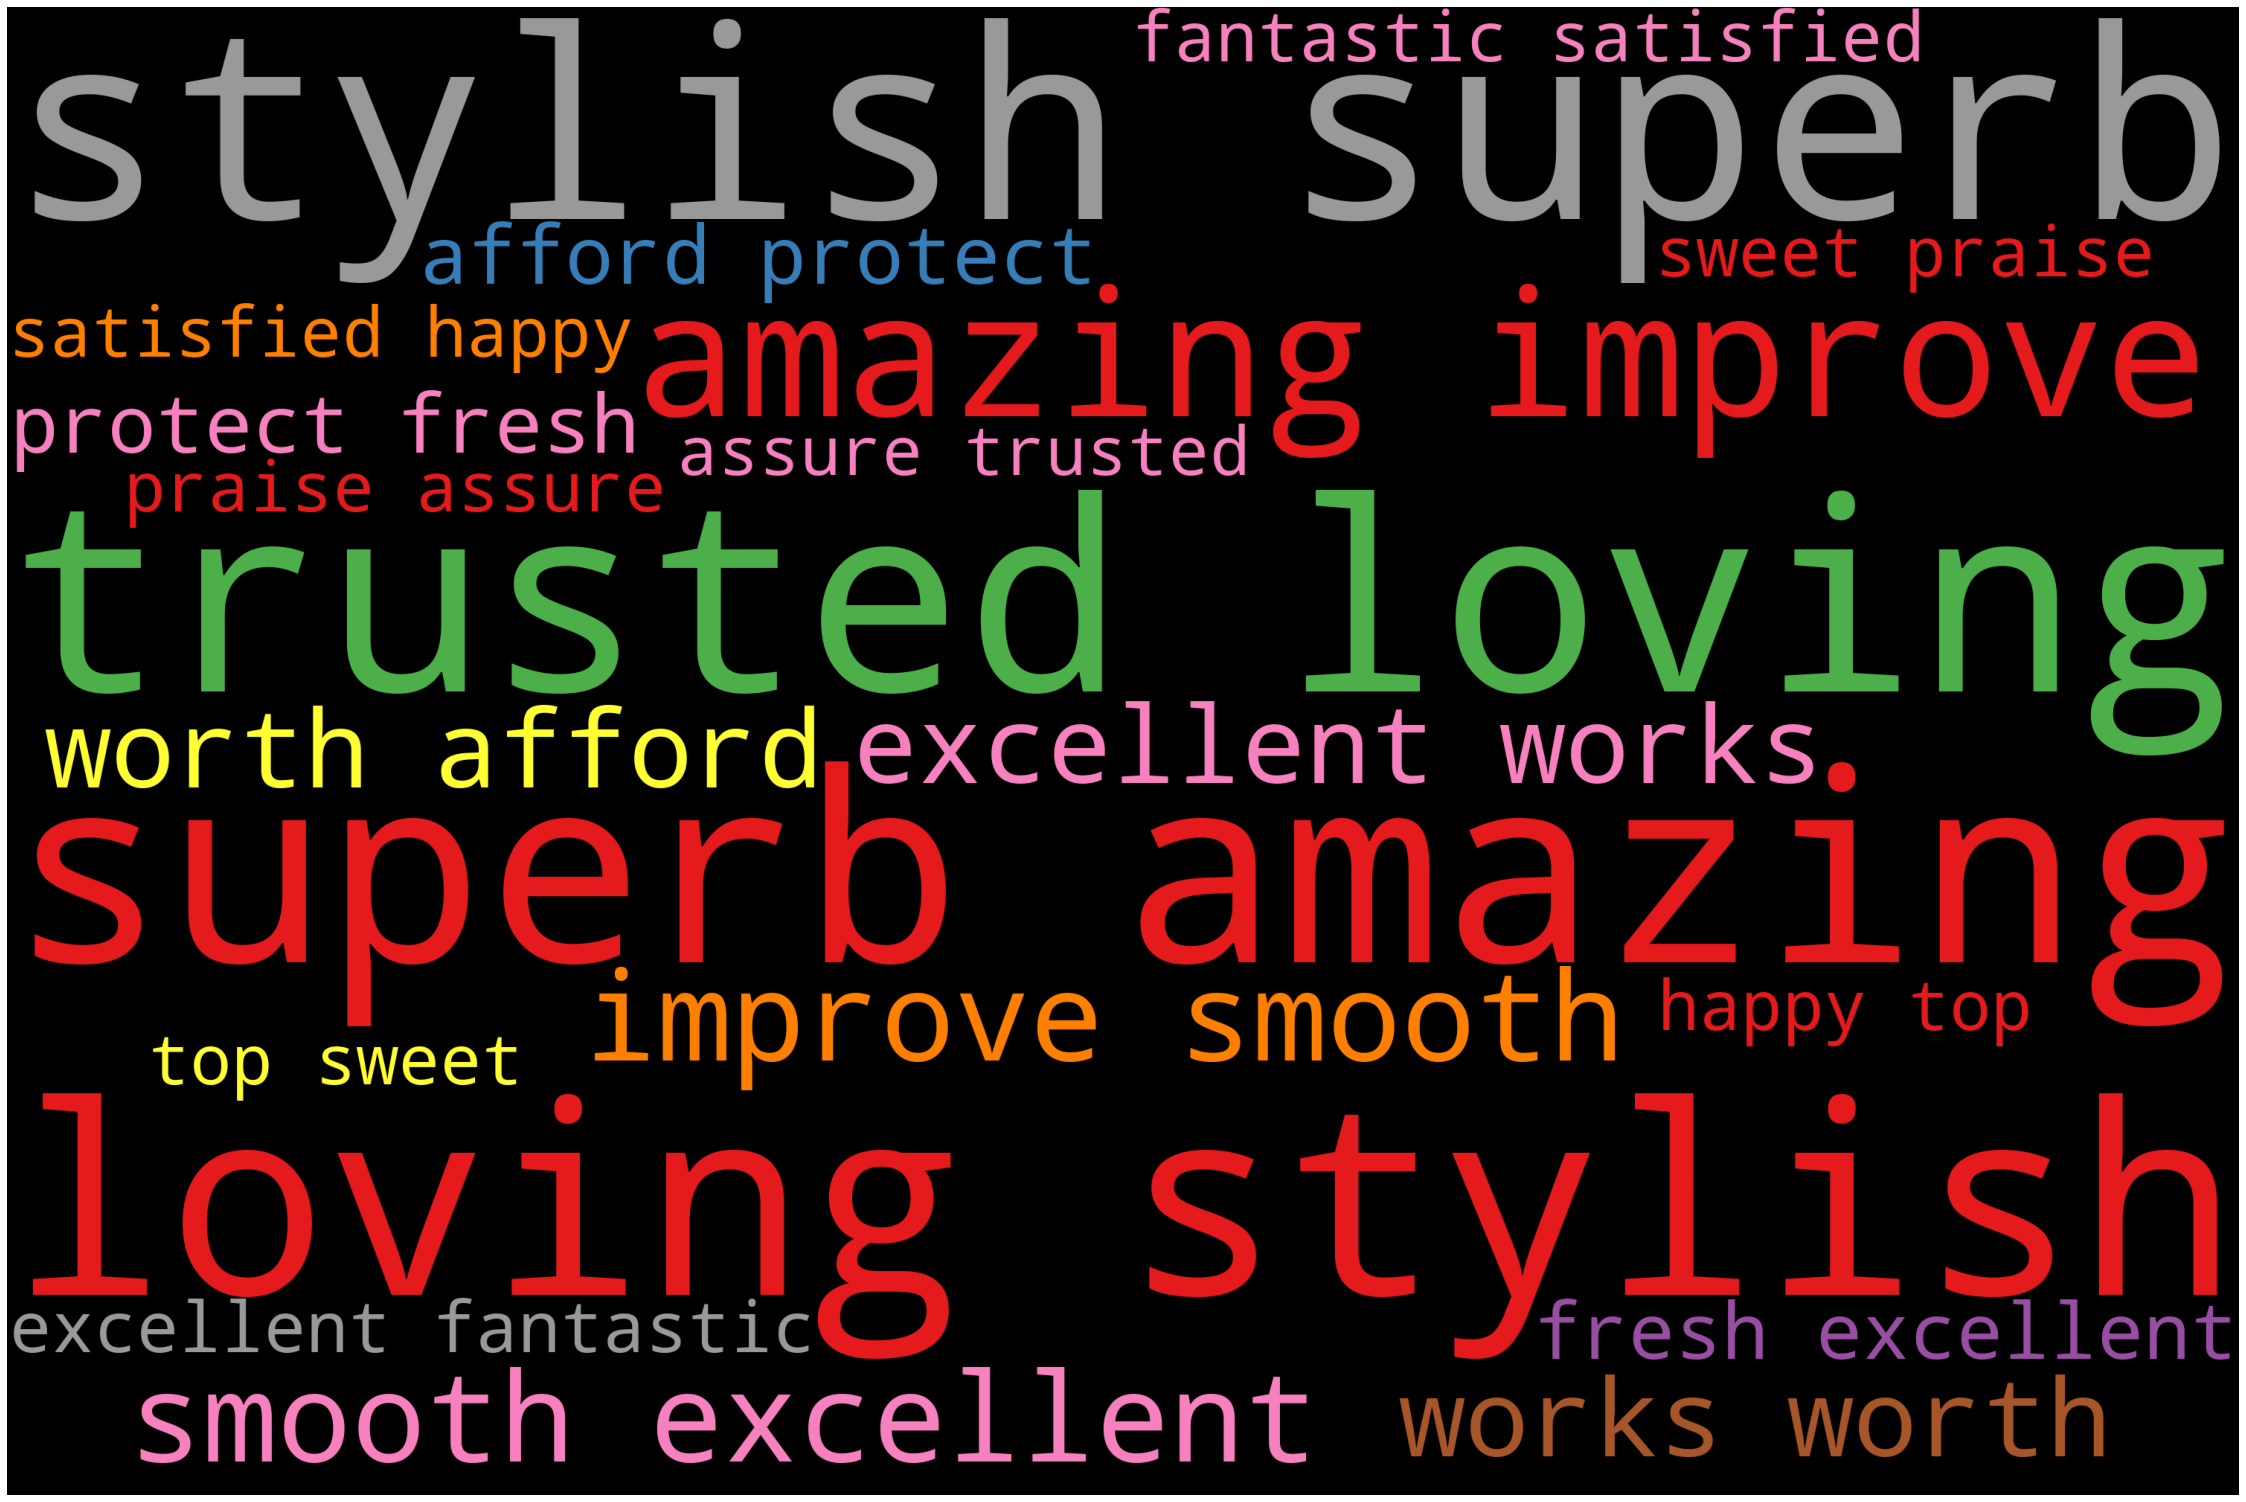

In [19]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    

from wordcloud import WordCloud, STOPWORDS
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=70,
                   colormap='Set1',stopwords=STOPWORDS).generate(reviews_pos)
plot_cloud(wordcloud)
